In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


This data is from the "Bike sharing demand" compettition on Kaggle. [The bike sharing data](https://www.kaggle.com/competitions/bike-sharing-)demand/overview. I will be using only the train set to train and a portion of it to test the efficiency of my machine learning algorithm prediction. Click on the link provided for more details.

In [11]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [14]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

NO missing values in our data set.

In [5]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train_df['season'].unique(), train_df['season'].nunique()

(array([1, 2, 3, 4], dtype=int64), 4)

In [8]:
train_df['holiday'].unique(),train_df['holiday'].nunique()

(array([0, 1], dtype=int64), 2)

In [9]:
train_df['weather'].unique(),train_df['weather'].nunique()

(array([1, 2, 3, 4], dtype=int64), 4)

In [12]:
 train_df['humidity'].nunique()

89

In [13]:
 train_df['humidity'].max(),  train_df['humidity'].min()

(100, 0)

In [39]:
train_df['workingday'].unique(),train_df['workingday'].nunique()

(array([0, 1], dtype=int64), 2)

In [41]:
train_df['count'].nunique()

822

# exploratory data analysis
To do this, we will first convert the datetime column into datatime format

Now lets work with the datetime column. The data time column is in the object format, we will convert it to datetime format using the pandas datetime module. --->

In [15]:
train_df['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: datetime
Non-Null Count  Dtype 
--------------  ----- 
10886 non-null  object
dtypes: object(1)
memory usage: 85.2+ KB


In [22]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

In [24]:
train_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [25]:
train_df['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.2 KB


In [34]:
train_df['hour'] = train_df['datetime'].apply(lambda date: date.hour)
train_df['weekday'] = train_df['datetime'].apply(lambda date: date.weekday())
train_df['month'] = train_df['datetime'].apply(lambda date: date.month)
train_df['year'] = train_df['datetime'].apply(lambda date: date.year)

In [35]:
train_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,2011


In [36]:
train_df['year'].unique()

array([2011, 2012], dtype=int64)

In [38]:
train_df['weekday'].nunique(), train_df['weekday'].unique()

(7, array([5, 6, 0, 1, 2, 3, 4], dtype=int64))

Lets begin exploring our data through visualizations

<Axes: xlabel='hour', ylabel='count'>

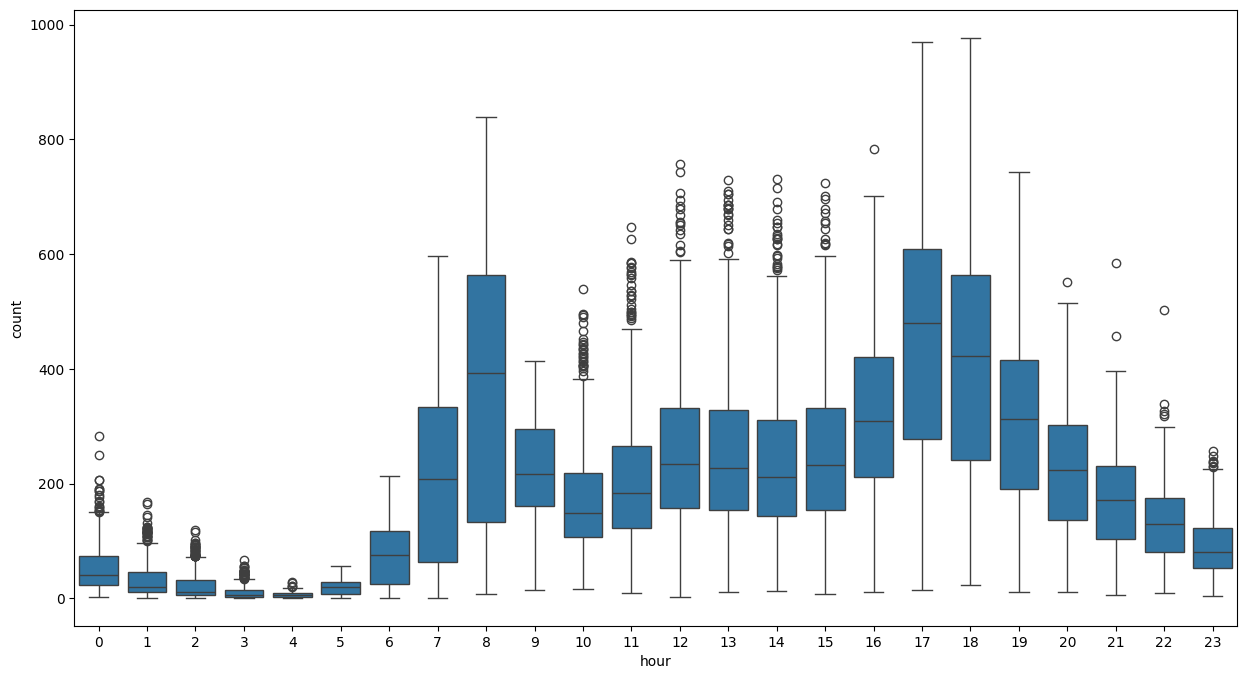

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(data=train_df, x='hour', y='count')

From the above, It is can be seen that the numbers starts peaking at around 7am and peaked at 8am, which is usually the morning rushing hour. It stabilizes and later starts peaking at 4pm and peaked the highest at 5pm, which is usually the evening peak hour. lets explore it by weekday --->

<Axes: xlabel='weekday', ylabel='count'>

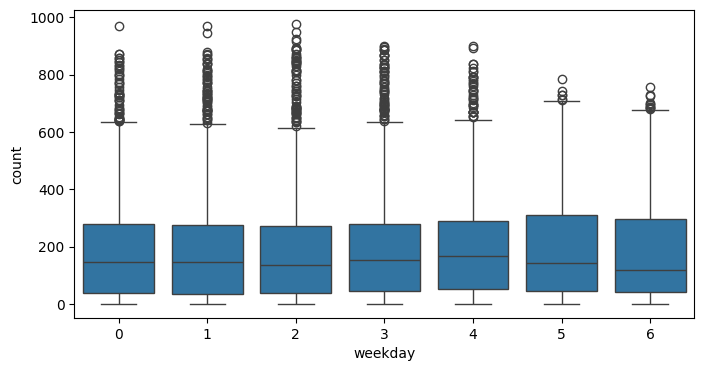

In [48]:
plt.figure(figsize=(8,4))
sns.boxplot(data=train_df, x='weekday', y='count')

<Axes: xlabel='month', ylabel='count'>

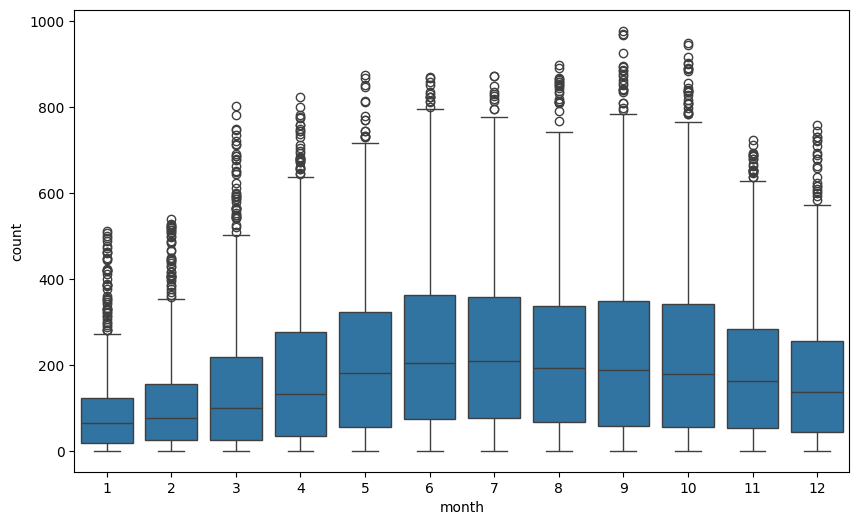

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_df, x='month', y='count')

The mean of total users lowest in the early year and late, and also peaks during the mid year around june, july and august. We should remember that december through January is winter and holidays season in washington DC where the data originate. while the peak here is during and around Summertime. Lets view it through the years---->

<Axes: xlabel='year', ylabel='count'>

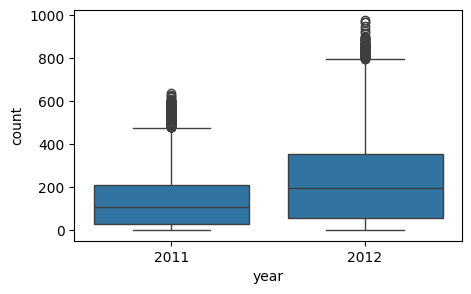

In [51]:
plt.figure(figsize=(5,3))
sns.boxplot(data=train_df, x='year', y='count')

There is an obvious increase in the number of total users form 2011 to 2012. This may be due to couple reasons such as Increase in the number of Bikes and access, Awareness, Incentives such as cheapness of ride and so on.